# Regresión de la distancia ortogonal

$$y = mx +n $$
Dado $(x_0,y_0)$, se define la distancia entre el punto y la recta anterior como:
$$d=\frac{|y_0-(mx_0+b)|}{\sqrt{m^2+1}}$$

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

session = tf.Session()
iris = datasets.load_iris()

In [71]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [72]:
batch_size = 50
learning_rate = 0.1

In [73]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
m = tf.Variable(tf.random_normal(shape=[1,1]))
n = tf.Variable(tf.random_normal(shape=[1,1]))

In [74]:
y_predict = tf.add(tf.matmul(x_data, m), n)

In [75]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data,m), n)))
demin_den = tf.sqrt(tf.add(tf.square(m), 1.0))
deming_loss = tf.reduce_mean(tf.truediv(deming_num, demin_den))

In [76]:
init = tf.global_variables_initializer()
session.run(init)

In [77]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(deming_loss)

In [78]:
loss_vect = []
for i in range(300):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict={x_data : rand_x, y_target: rand_y})
    temp_loss = session.run(deming_loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if(i+1)%20==0:
        print("Paso #"+str(i+1)+", m = "+str(session.run(m))+", n = "+str(session.run(n))+
             "Loss: "+str(temp_loss))

Paso #20, m = [[3.1753333]], n = [[-0.55475116]]Loss: 0.8028523
Paso #40, m = [[3.7387345]], n = [[-0.20804235]]Loss: 0.61211854
Paso #60, m = [[3.972806]], n = [[-0.01420544]]Loss: 0.53143466
Paso #80, m = [[4.074711]], n = [[0.10932745]]Loss: 0.53627986
Paso #100, m = [[4.096793]], n = [[0.17601275]]Loss: 0.51940346
Paso #120, m = [[4.1326537]], n = [[0.25160775]]Loss: 0.43380386
Paso #140, m = [[4.1218925]], n = [[0.29672754]]Loss: 0.40051937
Paso #160, m = [[4.127445]], n = [[0.3512653]]Loss: 0.4438797
Paso #180, m = [[4.086156]], n = [[0.37406585]]Loss: 0.5141621
Paso #200, m = [[4.0610056]], n = [[0.40744737]]Loss: 0.57654077
Paso #220, m = [[4.028671]], n = [[0.43813798]]Loss: 0.4845584
Paso #240, m = [[4.00139]], n = [[0.4738068]]Loss: 0.43204126
Paso #260, m = [[3.9969363]], n = [[0.5271341]]Loss: 0.48472646
Paso #280, m = [[3.978062]], n = [[0.5728057]]Loss: 0.54430467
Paso #300, m = [[3.9326694]], n = [[0.5975965]]Loss: 0.4714843


In [79]:
[[slope]] = session.run(m)
[[intercept]] = session.run(n)
print(str(slope)+"x+"+str(intercept))

3.9326694x+0.5975965


In [80]:
best_fit = []
for i in x_vals: 
    best_fit.append(slope * i +intercept)

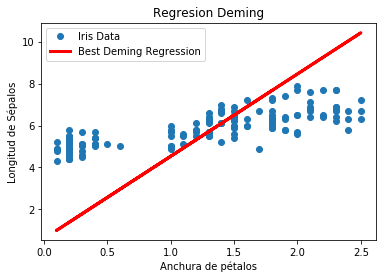

In [81]:
plt.plot(x_vals, y_vals, 'o', label = "Iris Data")
plt.plot(x_vals, best_fit, 'r-', label = "Best Deming Regression", linewidth = 3)
plt.legend(loc = "upper left")
plt.title("Regresion Deming")
plt.xlabel("Anchura de pétalos")
plt.ylabel("Longitud de Sépalos")
plt.show()

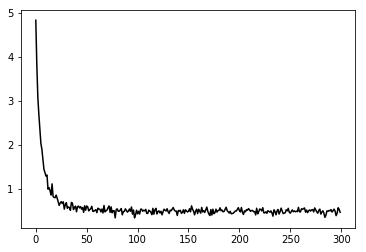

In [82]:
plt.plot(loss_vect, 'k-', label="Función de pérdidas")